# Introduction to Probability
This notebook provides a condensed summary of key concepts from an introductory probability course. Each section pairs theory with a short Python example.

## Probability
Probability quantifies uncertainty and helps us make everyday decisions, like planning activities based on the chance of rain. To understand probability, we first need to build a foundation in set theory, a branch of mathematics that provides the tools for analyzing probabilities.

### Sets, Sample Spaces & Events
Set theory studies collections of objects, called sets, usually written with curly braces. Sets follow two rules: elements are unique, and order doesn’t matter (e.g., {1,2,3,4,5} = {5,3,2,4,1}). Sets are often labeled with capital letters, like A = {1,2,3,4,5}. A set can also be a subset of another if all its elements are contained within the larger set (e.g., A = {1,2,3} is a subset of B = {1,2,3,4,5}).

In [1]:
S = set(range(1, 7))
A = {1, 3, 5}
B = {2, 3, 4}
print('Union:', A | B)
print('Intersection:', A & B)
print('Complement of A:', S - A)


Union: {1, 2, 3, 4, 5}
Intersection: {3}
Complement of A: {2, 4, 6}


### Experiments and Sample Spaces
In probability, an experiment produces outcomes with uncertainty. A sample point is a single outcome, and the sample space is the set of all possible outcomes. For example, flipping a coin twice gives S = {HH, TT, HT, TH}. Events are subsets of the sample space, like A = {HH} (two heads) or C = {HT, TH} (a mix of heads and tails).
The frequentist definition states that probability is the proportion of times an event occurs if the experiment is repeated infinitely. In practice, we approximate it with many trials. For instance, flipping two coins 1000 times gave HH in 252 cases, so P(HH) ≈ 252/1000 = 0.252 (25.2%). Results vary across trials, but by the law of large numbers, more repetitions bring estimates closer to the true probability.

### Law of Large Numbers (Frequentist Probability)
We can’t repeat our random experiment an infinite amount of times (as much FUN as that would be!). However, we can still flip both coins a large number of times. As we flip both coins more and more, the observed proportion of times each event occurs will converge to its true probability. This is called the law of large numbers.
Let’s observe the law of large numbers in real-time. We will use Python to simulate flipping both coins as many times as we want and watch the proportion of two heads converge to its true probability.
Let’s walk through each part of the code below one step at a time. You do not need to worry about every line of code, but understanding the overall objective will help you build your understanding of probability.

In the code below, we have written out a function called coin_flip_experiment() that simulates flipping two fair coins. Using a for loop we run coin_flip_experiment() a specific number of times. As this loop iterates, we track how often both coins come up as heads. Finally, using matplotlib, we plot the proportion of experiments resulting in two heads after each trial.
The number of times coin_flip_experiment() runs is determined by the num_trials variable on line 21. Currently, this variable is set to 5. Run the program a few times. On the resulting plot, the orange horizontal line is the true probability of observing two heads (0.25). The blue line is the proportion of heads we see throughout our trials. What do you notice about the blue line after each run?
You should see that the proportion of two heads after five trials is inconsistent. In some experiments, we may see zero observations of two heads, while in others, we may see almost all five observations are two heads. To simulate the law of large numbers, we need to do more trials. Set the num_trials variable to different values, such as these below:
100
1000
100000
Take note of what you observe. Where does the blue line on the graph converge to after many trials?

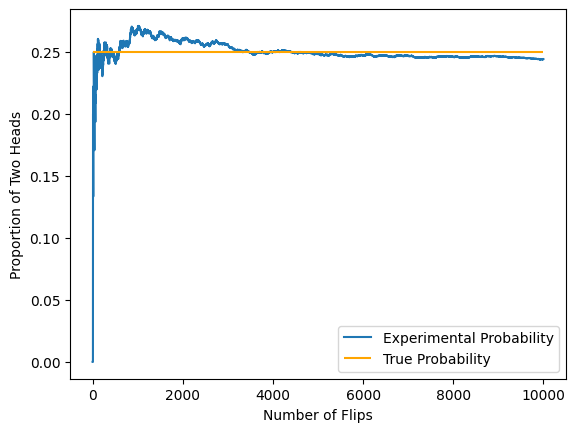

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def coin_flip_experiment():
  # defining our two coins as lists
  coin1 = ['Heads', 'Tails']
  coin2 = ['Heads', 'Tails']
 
  # "flipping" both coins randomly
  coin1_result = np.random.choice(coin1)
  coin2_result = np.random.choice(coin2)
 
  # checking if both flips are heads
  if coin1_result == 'Heads' and coin2_result == 'Heads':
    return 1
  else:
    return 0
 
# how many times we run the experiment
num_trials = 10000
prop = []
flips = []
# keep track of the number of times heads pops up twice
two_heads_counter = 0
 
# perform the experiment five times
for flip in range(num_trials):
  # if both coins are heads add 1 to the counter
  two_heads_counter += coin_flip_experiment()
  # keep track of the proportion of two heads at each flip 
  prop.append(two_heads_counter/(flip+1))
  # keep a list for number of flips
  flips.append(flip+1)
 
# plot all flips and proportion of two heads
plt.plot(flips, prop, label='Experimental Probability')
plt.xlabel('Number of Flips')
plt.ylabel('Proportion of Two Heads')

plt.hlines(0.25, 0, num_trials, colors='orange', label='True Probability')
plt.legend()


 
plt.show()

## Rules of Probability
Probability measures uncertainty: a fair coin has a 0.5 chance of tails, and a six-sided die has a 1/6 chance of rolling a five. When combining events, like flipping a coin and rolling a die simultaneously, we use probability rules to calculate the chance that both events happen together.

### Union, Intersection, and Complement

The union of two sets encompasses any element that exists in either one or both of them. We can represent this visually as a Venn diagram.
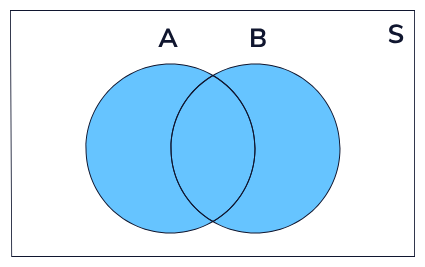
Union (A or B): outcomes in either or both sets. Example: odd numbers {1,3,5} ∪ numbers >2 {3,4,5,6} = {1,3,4,5,6}.

The intersection of two sets encompasses any element that exists in both of the sets. Visually:
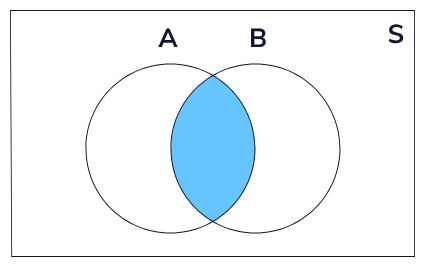
Example: {1,3,5} ∩ {3,4,5,6} = {3,5}.

Lastly, the complement of a set consists of all possible outcomes outside of the set. Visually:
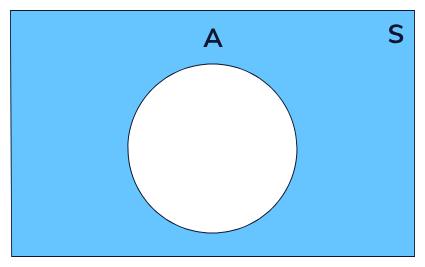
Complement (Aᶜ): outcomes outside the set. Example: complement of odd numbers {1,3,5} is even numbers {2,4,6}. A set and its complement together cover the whole sample space.

### Dependent and independent events
Independence means one event does not affect another—for example, past coin flips don’t change the probability of the next flip. Dependence occurs when earlier outcomes influence later ones, such as drawing marbles without replacement: the second draw depends on the first. With replacement, the events are independent again. Distinguishing independent from dependent events is crucial for calculating probabilities and has applications in fields like medicine, weather forecasting, and sports betting.

### Mutually Exclusive Events
Two events are mutually exclusive if they cannot happen at the same time. Their sample spaces do not overlap.
Example 1: A single coin flip → Events {Heads} and {Tails} are mutually exclusive. You cannot flip both at once.
Example 2: Rolling one die → Events {2} and {5} are mutually exclusive, since you can only roll one number.
Events that do share outcomes are not mutually exclusive.
Example 3: Rolling a die → Event A = odd numbers {1,3,5}, Event B = numbers greater than 2 {3,4,5,6}. These overlap at {3,5}, so they are not mutually exclusive.
Example 4: Drawing a card → Event A = drawing a red card, Event B = drawing a king. These overlap at red kings, so not mutually exclusive.

### Addition Rule
The addition rule helps calculate the probability that either of two events occurs.
General Rule:
P(A or B)=P(A)+P(B)−P(A and B)
We subtract the overlap 
P(A and B) because it gets counted twice.
Example (not mutually exclusive):
Roll a die.
Event A = odd number {1,3,5} → P(A) = 3/6 = 0.5
Event B = number > 2 {3,4,5,6} → P(B) = 4/6 ≈ 0.667
Overlap {3,5} → P(A and B) = 2/6 ≈ 0.333
So, P(A or B) = 0.5 + 0.667 – 0.333 = 0.834.
Mutually Exclusive Case:
If two events cannot happen together, their intersection is empty.
Formula simplifies to:
P(A or B)=P(A)+P(B).
Example (mutually exclusive):
Roll a die.
Event A = roll ≤ 2 {1,2} → P(A) = 2/6 = 0.333
Event B = roll ≥ 5 {5,6} → P(B) = 2/6 = 0.333
No overlap.
So, P(A or B) = 0.333 + 0.333 = 0.667

1. The function prob_a_or_b(a, b, all_possible_outcomes) calculates the probability of A or B using the addition rule, based on prob_a, prob_b, and prob_inter.
2. First scenario: roll a die → calculate probability of getting an even OR odd number using prob_a_or_b(evens, odds, all_possible_rolls).
3. Second scenario: roll a die → calculate probability of getting an odd number OR a number greater than 2 using prob_a_or_b(odds, greater_than_two, all_possible_rolls).
4. Third scenario: draw a card → calculate probability of getting a diamond OR a face card using prob_a_or_b(diamond_cards, face_cards, all_possible_cards).

In [9]:
def prob_a_or_b(a, b, all_possible_outcomes):
  # probability of event a = favorable outcomes in a / total outcomes
  prob_a = len(a)/len(all_possible_outcomes)
	
  # probability of event b = favorable outcomes in b / total outcomes
  prob_b = len(b)/len(all_possible_outcomes)
	
  # intersection of events a and b = outcomes common to both sets
  inter = a.intersection(b)
	
  # probability of the intersection = overlap outcomes / total outcomes
  prob_inter = len(inter)/len(all_possible_outcomes)
	
  # apply the addition rule: P(A or B) = P(A) + P(B) - P(A and B)
  return prob_a + prob_b - prob_inter


# ------------------------------
# 1st scenario: rolling a die once → even or odd number
evens = {2, 4, 6}
odds = {1, 3, 5}
all_possible_rolls = {1, 2, 3, 4, 5, 6}

# prints probability of rolling even OR odd (should equal 1, since they cover all outcomes)
print(prob_a_or_b(evens, odds, all_possible_rolls))


# ------------------------------
# 2nd scenario: rolling a die once → odd number or number greater than 2
odds = {1, 3, 5}
greater_than_two = {3, 4, 5, 6}
all_possible_rolls = {1, 2, 3, 4, 5, 6}

# prints probability of rolling odd OR > 2 (uses addition rule with overlap {3, 5})
print(prob_a_or_b(odds, greater_than_two, all_possible_rolls))


# ------------------------------
# 3rd scenario: drawing from a standard 52-card deck → diamond card or face card
diamond_cards = {'ace_diamond', '2_diamond', '3_diamond', '4_diamond', '5_diamond', '6_diamond', '7_diamond',
                 '8_diamond', '9_diamond', '10_diamond', 'jack_diamond', 'queen_diamond', 'king_diamond'}

face_cards = {'jack_diamond', 'jack_spade', 'jack_heart', 'jack_club',
              'queen_diamond', 'queen_spade', 'queen_heart', 'queen_club',
              'king_diamond', 'king_spade', 'king_heart', 'king_club'}

# all 52 cards in a deck = sample space
all_possible_cards = {'ace_diamond', '2_diamond', '3_diamond', '4_diamond', '5_diamond', '6_diamond', '7_diamond',
                      '8_diamond', '9_diamond', '10_diamond', 'jack_diamond', 'queen_diamond', 'king_diamond',
                      'ace_heart', '2_heart', '3_heart', '4_heart', '5_heart', '6_heart', '7_heart', '8_heart',
                      '9_heart', '10_heart', 'jack_heart', 'queen_heart', 'king_heart',
                      'ace_spade', '2_spade', '3_spade', '4_spade', '5_spade', '6_spade', '7_spade', '8_spade',
                      '9_spade', '10_spade', 'jack_spade', 'queen_spade', 'king_spade',
                      'ace_club', '2_club', '3_club', '4_club', '5_club', '6_club', '7_club', '8_club',
                      '9_club', '10_club', 'jack_club', 'queen_club', 'king_club'}

# print lengths for sanity check
print(len(diamond_cards))      # 13 diamonds
print(len(face_cards))         # 12 face cards
print(len(all_possible_cards)) # 52 cards

# manual calculation with formula: P(diamond) + P(face) - P(intersection)
# = 13/52 + 12/52 - 3/52 = 22/52
print((13/52)+(12/52)-(3/52))

# prints probability of drawing a diamond OR a face card
print(prob_a_or_b(diamond_cards, face_cards, all_possible_cards))

1.0
0.8333333333333333
13
12
52
0.4230769230769231
0.4230769230769231


### Conditional Probability
Conditional probability measures the likelihood of one event occurring given that another has already happened, written as P(A|B). For example, if we draw two marbles without replacement from a bag of five, the probability of getting a red marble second depends on the color of the first marble. If the first marble is blue, then the probability of red second is 3/4 since only four marbles remain. With replacement, the first draw does not affect the second, so the events are independent and P(A|B) = P(A), P(B|A) = P(B). Removing marbles changes the probabilities of the remaining outcomes, while replacing them keeps the probabilities the same.

### Multiplication Rule
The multiplication rule is used to calculate the probability that two events happen at the same time, written as P(A and B). In general, it is P(A) × P(B|A), which accounts for dependence between events. For dependent events, like drawing two marbles without replacement, the probability of Blue first and Blue second is (2/5) × (1/4) = 1/10. Tree diagrams help visualize these outcomes, showing all possible branches and their probabilities. For independent events, the formula simplifies to P(A and B) = P(A) × P(B). For example, flipping a coin twice gives a 0.25 probability of getting tails both times, since 0.5 × 0.5 = 0.25.

### Conditional Probability (pt. 2)
Conditional probability can be applied to real-world scenarios like medical testing. Suppose 20% of people have strep throat and 80% do not. If someone has strep, the test is positive 85% of the time and negative 15% of the time. If someone does not have strep, the test is negative 98% of the time and positive 2% of the time. Combining these, the probabilities of each full outcome are: P(ST and +) = 0.17, P(ST and -) = 0.03, P(NO ST and +) = 0.016, and P(NO ST and -) = 0.784, which sum to 1. The key question becomes: if a person tests positive, what is the probability they actually have strep? This is written as P(ST|+), which we can calculate using the tree diagram.

### Bayes Theorem
Bayes’ Theorem helps calculate the probability of an event given new evidence. In the strep throat example, we want P(ST|+), the probability of having strep given a positive test. The formula is P(ST|+) = [P(+|ST) × P(ST)] / P(+). We know P(+|ST) = 0.85 and P(ST) = 0.20. To find P(+), we add the probabilities of all positive results: P(ST and +) + P(NO ST and +) = 0.17 + 0.016 = 0.186. Plugging values in gives P(ST|+) = (0.85 × 0.20) / 0.186 = 0.914, meaning a positive test result corresponds to a 91.4% chance of actually having strep throat.

In [10]:
# Probabilities from the example
P_ST = 0.20          # Probability of having strep
P_NO_ST = 0.80       # Probability of not having strep

P_pos_given_ST = 0.85
P_neg_given_ST = 0.15
P_pos_given_NO_ST = 0.02
P_neg_given_NO_ST = 0.98

# Joint probabilities
P_ST_and_pos = P_ST * P_pos_given_ST   # 0.17
P_ST_and_neg = P_ST * P_neg_given_ST   # 0.03
P_NO_ST_and_pos = P_NO_ST * P_pos_given_NO_ST  # 0.016
P_NO_ST_and_neg = P_NO_ST * P_neg_given_NO_ST  # 0.784

# Marginal probabilities
P_pos = P_ST_and_pos + P_NO_ST_and_pos  # 0.186
P_neg = P_ST_and_neg + P_NO_ST_and_neg  # 0.814

# ---- Method 1: Bayes theorem ----
P_ST_given_neg = P_ST_and_neg / P_neg
P_NO_ST_given_pos = P_NO_ST_and_pos / P_pos
P_NO_ST_given_neg = P_NO_ST_and_neg / P_neg

print("Using Bayes' Theorem:")
print("P(ST | -) =", round(P_ST_given_neg, 3))
print("P(NO ST | +) =", round(P_NO_ST_given_pos, 3))
print("P(NO ST | -) =", round(P_NO_ST_given_neg, 3))

# ---- Method 2: Table-based approach (joint / marginal) ----
# Equivalent but computed directly via proportions
print("\nUsing Joint / Marginal Probabilities:")
print("P(ST | -) =", round(P_ST_and_neg / P_neg, 3))
print("P(NO ST | +) =", round(P_NO_ST_and_pos / P_pos, 3))
print("P(NO ST | -) =", round(P_NO_ST_and_neg / P_neg, 3))

Using Bayes' Theorem:
P(ST | -) = 0.037
P(NO ST | +) = 0.086
P(NO ST | -) = 0.963

Using Joint / Marginal Probabilities:
P(ST | -) = 0.037
P(NO ST | +) = 0.086
P(NO ST | -) = 0.963


## Introduction to Probability Distributions
A probability distribution describes how the probabilities of different possible outcomes of a random variable are spread out. It can be represented as a table, formula, or graph, showing the likelihood of each outcome in a sample space.

### Random Variable
A random variable is a numeric function that represents the outcome of a random event, such as rolling a die or flipping a coin (where heads might be 1 and tails 0). In Python, we can simulate random variables using np.random.choice(), which lets us sample values from a list, specify how many to draw, and decide whether to replace values after each draw.

The following code uses NumPy to simulate rolling dice multiple times. First, die_6 = range(1,7) defines a six-sided die with values 1 through 6, and num_rolls = 10 specifies the number of rolls to perform. The function np.random.choice(die_6, size=num_rolls, replace=True) randomly selects 10 values from the die, with replacement meaning each roll is independent, and stores them in results_1. The same process is repeated with die_12 = range(1,13), representing a twelve-sided die, and another set of 10 rolls is generated in results_2. The print() statements display the outcomes for each simulation.

In [11]:
import numpy as np

# create 6 sided "die"
die_6 = range(1, 7)

# set number of rolls
num_rolls = 10

# roll the "die" the set amount of times
results_1 = np.random.choice(die_6, size = num_rolls, replace = True)
print(results_1)

# create 12-sided "die"
die_12 = range(1,13)


# roll the 12-sided "die" 10 times
#results_2 = 
results_2 = np.random.choice(die_12, size = num_rolls, replace = True)
print(results_2)


[4 1 5 3 1 6 3 4 5 3]
[ 6  6  9  7  5 12  8  4 11  7]


### Discrete and Random variables
Discrete random variables take on a countable set of values, such as die rolls or the number of customers in a store, where outcomes are whole numbers. Continuous random variables, on the other hand, have uncountable possibilities since they represent measurements that can be made with increasing precision, such as temperature or height.

### Probability Mass Function (PMF)
A probability mass function (PMF) gives the probability of each possible outcome of a discrete random variable. For instance, it can tell us the chance of rolling a three on a fair six-sided die. Some PMFs are used so often they have names and parameters, like the binomial distribution, which models the number of successes in repeated trials. Its parameters are n (number of trials) and p (probability of success per trial). For example, flipping a fair coin 10 times follows a Binomial(n=10, p=0.5) distribution, where the PMF shows the probabilities of getting 0, 1, 2, …, up to 10 heads.

In Python, the scipy.stats.binom.pmf() function calculates the probability of a specific outcome in a binomial distribution. It requires three inputs: x (the outcome of interest), n (the number of trials), and p (the probability of success in each trial). For example, flipping a fair coin 10 times, the probability of getting exactly 6 heads is stats.binom.pmf(6, 10, 0.5), which equals about 0.205.
in the following code snippet we use the scipy.stats library to calculate probabilities from a binomial distribution with success probability 0.5 (like flipping a fair coin). The function stats.binom.pmf(x, n, 0.5) returns the probability of getting exactly x successes in n trials. In the first case, it calculates the probability of observing exactly 3 successes in 10 trials and prints the result. Then, it reassigns x = 7 and n = 20 to set up a second calculation for the probability of exactly 7 successes in 20 trials, storing the result in prob_2 (though it is not printed).

In [18]:
import scipy.stats as stats

# number of successes (3 heads)
x = 3
# number of trials (10 launches of a fair coin)
n = 10

# calculate probability
prob_1 = stats.binom.pmf(x, n, 0.5)
print("Prob of success of getting 3 heads in 10 launches: ", prob_1)

# number of successes (7 heads) on n trials
x = 7
n = 20
## Question 2
prob_2 = stats.binom.pmf(x, n, 0.5)
print("Prob of success of getting 7 heads in 20 launches: ", prob_2)

Prob of success of getting 3 heads in 10 launches:  0.1171875
Prob of success of getting 7 heads in 20 launches:  0.07392883300781235


### PMF over a range of values
The probability mass function can also be used to calculate the probability of a random variable falling within a range of values by summing individual probabilities. For example, if a fair coin is flipped 5 times, the probability of getting between 1 and 3 heads is found by adding P(X=1), P(X=2), and P(X=3), which equals 0.7812.
In Python, we can use scipy.stats.binom.pmf() to calculate probabilities of ranges in a binomial distribution by summing individual probabilities. For example, the probability of getting 2 to 4 heads in 10 flips is the sum of P(2), P(3), and P(4), which equals 0.366. Similarly, to find P(X < 3), we sum P(0), P(1), and P(2), giving 0.0547. When ranges involve many values, summing each term becomes repetitive, so we can use complements: since total probability equals 1, P(0 to 8 heads) = 1 – (P(9) + P(10)) = 0.9893, which is easier to compute.

The next code uses the binomial probability mass function from scipy.stats to calculate probabilities for a coin-flip experiment with 10 trials and probability of success 0.5 (fair coin).
In Checkpoint 1, it computes the probability of getting between 4 and 6 heads (inclusive) by summing P(X=4), P(X=5), and P(X=6).
In Checkpoint 2, it computes the probability of getting at least 3 heads by taking 1 minus the probability of getting fewer than 3 heads (P(0), P(1), and P(2)).
Both checkpoints illustrate two common approaches to handling probability ranges: summing individual outcomes and using the complement rule.

In [20]:
## Checkpoint 1
prob_1 = (stats.binom.pmf(4, n=10, p=.5) + stats.binom.pmf(5, n=10, p=.5) + stats.binom.pmf(6, n=10, p=.5))
print("Probability of getting between 4 and 6 head in10 trials: ", prob_1)

## Checkpoint 2
prob_2 = 1 - (stats.binom.pmf(0, n=10, p=.5) + stats.binom.pmf(1, n=10, p=.5) + stats.binom.pmf(2, n=10, p=.5))
print("Probability of getting fewer than 3 heads (P(0), P(1), and P(2))", prob_2)


Probability of getting between 4 and 6 head in10 trials:  0.6562499999999998
Probability of getting fewer than 3 heads (P(0), P(1), and P(2)) 0.9453125


### The Cumulative Distribution Function (CDF)
The cumulative distribution function (CDF) gives the probability that a discrete random variable is less than or equal to a certain value. Unlike the probability mass function, which gives the probability of a single outcome, the CDF adds up probabilities from all smaller outcomes, reaching 1 at the maximum possible value. Since probabilities accumulate, the CDF is always non-decreasing: for larger values, the function’s value is greater. For example, the probability of getting fewer than 3 heads in 10 flips can be found directly using CDF(X=2), which is simpler than summing individual PMF values for 0, 1, and 2 heads.

A cumulative distribution function (CDF) can be used to calculate probabilities over a range by subtracting two values. For example, the probability of getting between 3 and 6 heads is found by taking P(X ≤ 6) and subtracting P(X ≤ 2). This works because subtracting the probability of outcomes up to 2 leaves only the probability of outcomes from 3 through 6.

In Python, the scipy.stats.binom.cdf() function calculates cumulative probabilities for a binomial distribution. It gives the probability of observing a value or less, based on inputs x (value of interest), n (number of trials), and p (probability of success). For example, stats.binom.cdf(6, 10, 0.5) gives the probability of getting 6 or fewer heads in 10 coin flips (0.8281). To calculate a range, such as 4 to 8 heads, we subtract CDF(3) from CDF(8), giving 0.8174. To find probabilities of values greater than a threshold, like more than 6 heads, we use the complement rule: 1 - stats.binom.cdf(6, 10, 0.5) = 0.1719.

In [23]:
import scipy.stats as stats

## Checkpoint 1
"""Using the cumulative distribution function (CDF):
This calculates the probability of getting 3 or fewer heads 
when flipping a fair coin 10 times, i.e., P(X ≤ 3).
"""
prob_1 = stats.binom.cdf(3, 10, .5)
print("Prob computed with CDF ", prob_1)

"""Compare with the same result calculated using the probability mass function (PMF):
Here we add up the individual probabilities P(X=0), P(X=1), P(X=2), and P(X=3).
"""
print("Prob computed adding all subvalues ", stats.binom.pmf(0, n=10, p=.5) + 
      stats.binom.pmf(1, n=10, p=.5) + 
      stats.binom.pmf(2, n=10, p=.5) + 
      stats.binom.pmf(3, n=10, p=.5))


## Checkpoint 3
"""This calculates the probability of getting MORE than 5 heads in 10 flips.
We use the complement rule: 1 - P(X ≤ 5)."""
prob_2 = 1 - stats.binom.cdf(5, 10, .5)
print("Prob computed with CDF ", prob_2)


## Checkpoint 4
"""This calculates the probability of getting between 2 and 5 heads inclusive.
It is done by taking P(X ≤ 5) and subtracting P(X ≤ 1), 
which leaves only the probabilities for X = 2, 3, 4, and 5.
"""
prob_3 = stats.binom.cdf(5, 10, .5) - stats.binom.cdf(1, 10, .5)
print("Prob computed with CDF ", prob_3)

"""Compare with the same result using the PMF:
Here we explicitly add up P(X=2) + P(X=3) + P(X=4) + P(X=5)."""
print("Prob computed adding all subvalues ", stats.binom.pmf(2, n=10, p=.5) + 
      stats.binom.pmf(3, n=10, p=.5) + 
      stats.binom.pmf(4, n=10, p=.5) + 
      stats.binom.pmf(5, n=10, p=.5))

Prob computed with CDF  0.171875
Prob computed adding all subvalues  0.17187500000000006
Prob computed with CDF  0.376953125
Prob computed with CDF  0.6123046875
Prob computed adding all subvalues  0.6123046875


A probability density function (PDF) describes the distribution of a continuous random variable, where probabilities correspond to the area under the curve, and the total area equals 1. Unlike discrete random variables, the probability at a single point is always 0, so we calculate probabilities over intervals. For example, women’s heights follow a Normal(167.64, 8) distribution, and the probability of being under 158 cm is found by evaluating the cumulative distribution function (CDF), which gives the area from 0 to 158. In Python, this can be computed with stats.norm.cdf(158, 167.64, 8), yielding 0.1141.

In [24]:
# Calculate PDF but with a normal distribution
prob = stats.norm.cdf(175, 167.64, 8)
print(prob)

0.8212136203856288


### Probability Density Functions and Cumulative Distribution Function
For continuous random variables, probabilities over ranges are found by subtracting cumulative probabilities. For example, to find the probability of a woman’s height being between 165 cm and 175 cm under a Normal(167.74, 8) distribution, we calculate P(X < 175) − P(X < 165), which equals 0.4519. To find probabilities of values greater than a point, we use the complement rule: P(X > 172) = 1 − P(X < 172), giving 0.2972. Both methods rely on the cumulative distribution function (CDF) and the fact that the total area under the probability density curve is 1.

In [26]:
# The weather in the Galapagos Islands follows a Normal distribution
# Mean (loc) = 20°C, Standard deviation (scale) = 3°C

## Checkpoint 1
# Calculate the probability that the temperature is between 18°C and 25°C.
# This is done by taking P(X ≤ 25) and subtracting P(X ≤ 18),
# leaving only the probability in the range 18 < X < 25.
temp_prob_1 = stats.norm.cdf(25, 20, 3) - stats.norm.cdf(18, 20, 3)
print(temp_prob_1)  # prints the probability of 18°C ≤ X ≤ 25°C

## Checkpoint 2
# Calculate the probability that the temperature is greater than 24°C.
# This is done using the complement rule: 1 - P(X ≤ 24).
temp_prob_2 = 1 - stats.norm.cdf(24, 20, 3)
print(temp_prob_2)  # prints the probability of X > 24°C

0.6997171101802624
0.09121121972586788


## Introduction to the Poisson Distribution
The Poisson distribution models how many times an event occurs within a fixed time or space interval, such as cars passing an intersection in an hour or calls received in an office. It is defined by the rate parameter λ (lambda), which represents the expected number of occurrences. The probability mass function (PMF) shows the likelihood of different counts, centered around λ. As λ increases, the distribution spreads out, reflecting greater variance in possible outcomes.
For example, if our expected number of customers between 1pm and 2pm is 7, then we would set the parameter for the Poisson distribution to be 7. The PMF for the Poisson(7) distribution is as follows:
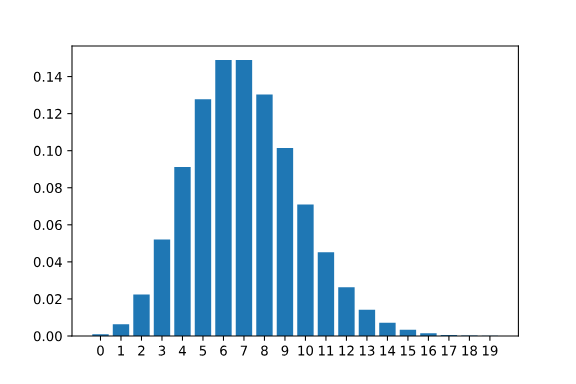

### Calculating Probabilities of Exact Values Using the Probability Mass Function
The Poisson distribution is discrete and can be described using a probability mass function (PMF) or a cumulative distribution function (CDF). With `scipy.stats.poisson.pmf()`, we can calculate the probability of observing a specific value given λ, the expected rate. For example, if we expect 10 rainy days in 30 days, the probability of exactly 6 rainy days is about 0.063. We can also sum multiple PMF values to find probabilities over a range: the probability of 12 to 14 rainy days is about 0.220.

In [29]:
## Checkpoint 1
# Probability of getting exactly 15 calls when the average rate (λ) is 15
prob_15 = stats.poisson.pmf(15, 15) 
print("Probability of getting exactly 15 calls:", prob_15)


## Checkpoint 2
# Probability of getting between 7 and 9 calls inclusive 
# (P(X=7) + P(X=8) + P(X=9))
prob_7_to_9 = (
    stats.poisson.pmf(7, 15) +
    stats.poisson.pmf(8, 15) +
    stats.poisson.pmf(9, 15)
)
print("Probability of getting between 7 and 9 calls:", prob_7_to_9)

Probability of getting exactly 15 calls: 0.1024358666645339
Probability of getting between 7 and 9 calls: 0.062221761061894816


### Calculating Probabilities of a Range using the Cumulative Distribution Function
The poisson.cdf() method lets us calculate probabilities for ranges more efficiently than summing individual PMF values. For example, with λ = 10, stats.poisson.cdf(6, 10) gives about 0.13, meaning a 13% chance of 6 or fewer rainfalls in 30 days. To find probabilities of “greater than or equal to” outcomes, we use the complement rule: 1 - stats.poisson.cdf(11, 10) gives about 0.30 for 12 or more rainfalls. For ranges, we subtract two CDF values, e.g., stats.poisson.cdf(18, 10) - stats.poisson.cdf(11, 10) gives about 0.296, the probability of 12 to 18 rainfalls.

In [30]:
# We are modeling the number of calls per hour in a call center
# The expected value (λ) is 15 calls per hour, following a Poisson distribution.

## Checkpoint 1
# Calculate the probability of observing MORE than 20 calls in the hour.
# We use the complement rule: 1 - P(X ≤ 20).
# stats.poisson.cdf(20, 15) gives the probability of 20 or fewer calls,
# so subtracting from 1 leaves us with the probability of more than 20 calls.
prob_more_than_20 = 1 - stats.poisson.cdf(20, 15)

# Print the result with an explanation
print("Probability of observing more than 20 calls:", prob_more_than_20)


## Checkpoint 2
# Calculate the probability of observing BETWEEN 17 and 21 calls (inclusive).
# This is done by subtracting P(X ≤ 16) from P(X ≤ 21),
# which leaves the probability of outcomes 17, 18, 19, 20, and 21.
prob_17_to_21 = stats.poisson.cdf(21, 15) - stats.poisson.cdf(16, 15)

# Print the result with an explanation
print("Probability of observing between 17 and 21 calls:", prob_17_to_21)

Probability of observing more than 20 calls: 0.08297091003146029
Probability of observing between 17 and 21 calls: 0.2827703929341844


### Expectation of the Poisson Distribution
The parameter λ in the Poisson distribution represents the expected value, or long-run average, of events. For example, if salespeople average 10 sales per week, the Poisson(10) distribution has its highest probability near 10, though actual weekly sales can vary widely. Using stats.poisson.rvs(10, size=1000) to simulate 1000 weeks produces a histogram centered near 10, with individual values ranging from around 2 to 20. The sample mean from these observations is about 10, confirming that the expected value reflects the long-term average, consistent with the Law of Large Numbers.
Here is a graph of this type of Poisson distribution: 
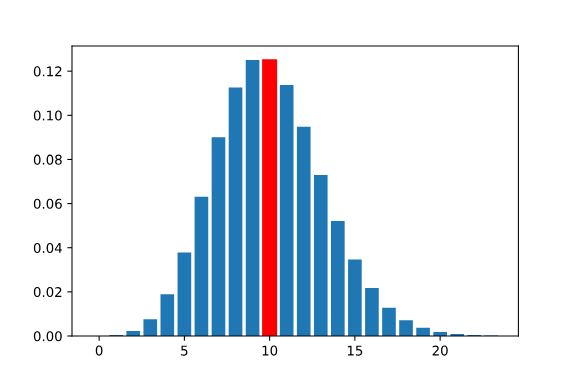

The following function histogram_function(rand_vars) creates and displays a histogram of the values stored in rand_vars. Here’s what each part does:
- plt.hist(rand_vars, bins = np.arange(len(set(rand_vars)))-0.5, edgecolor = "black"): Plots a histogram of the random variables.
- bins = np.arange(len(set(rand_vars)))-0.5 ensures that each integer value gets its own centered bar (important for discrete data like Poisson samples).
- edgecolor = "black" makes each bar’s outline visible for clarity.
- plt.xticks(list(range(rand_vars.max()))): Sets the x-axis ticks to show all integer values from 0 up to the maximum observed value in rand_vars.
- plt.show(): Displays the histogram plot.

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def histogram_function(rand_vars):
  plt.hist(rand_vars, bins = np.arange(len(set(rand_vars)))-0.5, edgecolor = "black")
  plt.xticks(list(range(rand_vars.max())))
  plt.show()

Sample mean of the 1000 random draws: 15.258


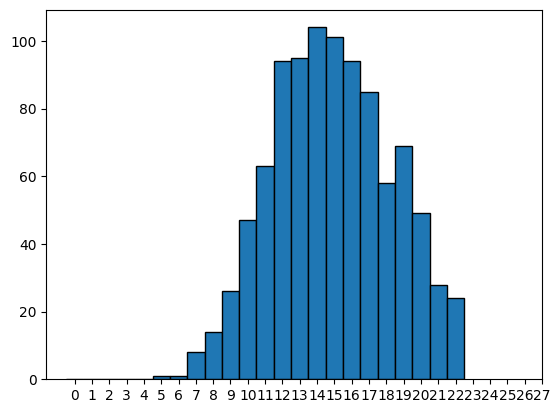

In [36]:
## Checkpoint 1
# Generate 1000 random values (variates) from a Poisson distribution
# with an expected value (λ) of 15. Each value represents a possible
# outcome of how many events (e.g., calls in a call center) might occur
# in a given time frame when the average is 15.
rand_vars = stats.poisson.rvs(15, size=1000)

## Checkpoint 2
# Calculate and print the mean of the 1000 simulated outcomes.
# This sample mean should be close to λ = 15, since λ is the
# expected value of the Poisson distribution.
print("Sample mean of the 1000 random draws:", rand_vars.mean())

## Checkpoint 3
# Plot a histogram of the simulated random variables to visualize
# the distribution. The histogram should show values centered
# around 15 with variability typical of a Poisson(15) distribution.
histogram_function(rand_vars)


### Expected Value of the Binomial Distribution
The expected value of a binomial distribution is given by the formula 
E(X)=n×p, where n is the number of trials and p is the probability of success. For example, flipping a fair coin 10 times gives an expected 5 heads (10×0.5). The expected value can also be fractional, like 2.5 heads in 5 flips, even though that outcome isn’t directly observable. In another case, guessing “B” on all 20 multiple-choice questions with 4 options each gives an expected 5 correct answers (20×0.25). This shows that the expected value represents the long-run average outcome, not necessarily a single observed result.

In [37]:
## Checkpoint 1
# A basketball player takes 20 free throws.
# Each free throw has a probability of success (making the shot) = 0.85.
# The expected number of successful free throws is given by n × p.
expected_baskets = 20 * 0.85
print("Expected number of made free throws:", expected_baskets)


## Checkpoint 2
# A student has a 98% chance of being on time (or early) each school day.
# Therefore, the probability of being late = 1 - 0.98 = 0.02.
# Over 180 school days, the expected number of times late is n × p.
expected_late = 180 * (1 - 0.98)
print("Expected number of times the student is late:", expected_late)

Expected number of made free throws: 17.0
Expected number of times the student is late: 3.600000000000003


### Variance of the Binomial Distribution
The variance of a binomial distribution measures how much outcomes deviate from the expected value. It is calculated with the formula $Var(X) = n \times p \times (1-p)$, where *n* is the number of trials and *p* the probability of success. For example, with 10 fair coin flips, the variance is $10 \times 0.5 \times 0.5 = 2.5$. For a 20-question multiple-choice quiz with a 25% chance of guessing correctly, the variance is $20 \times 0.25 \times 0.75 = 3.75$. This shows that while the expected number of correct answers is 5, the distribution spreads around this value with variance 3.75.


In [38]:
## Checkpoint 1
# A basketball player takes 20 free throws.
# Probability of making a shot (success) = 0.85.
# Variance formula for a Binomial distribution: Var(X) = n × p × (1 - p).
# Here: n = 20, p = 0.85.
variance_baskets = 0.85 * (1 - 0.85) * 20
print("Variance of made free throws (20 attempts, p=0.85):", variance_baskets)


## Checkpoint 2
# A student has a 98% chance of being on time each school day.
# Probability of being late (success for this scenario) = 1 - 0.98 = 0.02.
# Number of school days (trials) = 180.
# Using Var(X) = n × p × (1 - p):
# Here: n = 180, p = 0.02.
variance_late = 0.98 * (1 - 0.98) * 180
print("Variance of late arrivals in 180 school days (p=0.02):", variance_late)

Variance of made free throws (20 attempts, p=0.85): 2.55
Variance of late arrivals in 180 school days (p=0.02): 3.528000000000003


### Properties of Expectation and Variance
Expectation and variance follow general rules across all distributions. For expectation: the expected value of independent variables adds up (E(X+Y)=E(X)+E(Y)), multiplying by a constant scales the expectation (E(aX)=aE(X)), and adding a constant shifts the expectation by that amount (E(X+a)=E(X)+a). For variance: adding a constant does not change variance (Var(X+a)=Var(X)), scaling by a constant multiplies variance by the constant squared (Var(aX)=a²Var(X)), and the variance of the sum of independent variables is the sum of their variances (Var(X+Y)=Var(X)+Var(Y)). These properties show how averages shift and spreads change under transformations or combinations of random variables.

In [39]:
## Checkpoint 1
# The expected value of the bonus is 8% of the average salary.
# Since the average salary = 75,000, the expected bonus is:
# E(bonus) = 0.08 × 75,000
expected_bonus = 0.08 * 75000
print("Expected value of the bonus:", expected_bonus)


## Checkpoint 2
# The number of goals scored per game follows a Poisson distribution with λ = 4.
# We simulate 100 random draws (games) from this distribution.
num_goals = stats.poisson.rvs(4, size=100)


## Checkpoint 3
# Calculate and print the variance of the simulated goals.
# This shows the spread of the number of goals across the 100 games.
print("Variance of number of goals (original):", np.var(num_goals))


## Checkpoint 4
# Suppose each goal is now counted as 2 goals.
# Multiply all values in num_goals by 2 to create a new dataset.
num_goals_2 = num_goals * 2

# Print the variance of this new dataset.
# According to the variance property, Var(aX) = a² Var(X).
# Here, a = 2, so the variance should be 4 times the original variance.
print("Variance of number of goals (scaled by 2):", np.var(num_goals_2))



Expected value of the bonus: 6000.0
Variance of number of goals (original): 3.4778999999999995
Variance of number of goals (scaled by 2): 13.911599999999998
